# Import Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

In [9]:
file_path = 'hotel_booking.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset

In [10]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

# Display the structure of the dataset

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Check for missing values

In [12]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

children         4
country        488
agent        16340
company     112593
dtype: int64


# Handle missing values (drop rows with missing values for simplicity)

In [13]:
df = df.dropna()

# Verify no missing values remain

In [14]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# Display the data types of each column

In [15]:
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Select numerical columns for correlation analysis

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


# Compute the correlation matrix for numerical columns

In [17]:
correlations = df[numerical_columns].corr()
print(correlations)

                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000  -0.039767          -0.069527   
lead_time                         -0.039767   1.000000           0.232138   
arrival_date_year                 -0.069527   0.232138           1.000000   
arrival_date_week_number          -0.003159   0.106130          -0.768645   
arrival_date_day_of_month          0.002215   0.068615           0.367765   
stays_in_weekend_nights           -0.133996   0.097390          -0.293971   
stays_in_week_nights              -0.105148  -0.001527          -0.437521   
adults                            -0.032118   0.345290           0.105956   
children                           0.027563  -0.061248           0.145736   
babies                                  NaN        NaN                NaN   
is_repeated_guest                 -0.011839  -0.136182           0.278636   
previous_cancellations            -0.019837  -0.024873           0.145344   

# Visualize correlations

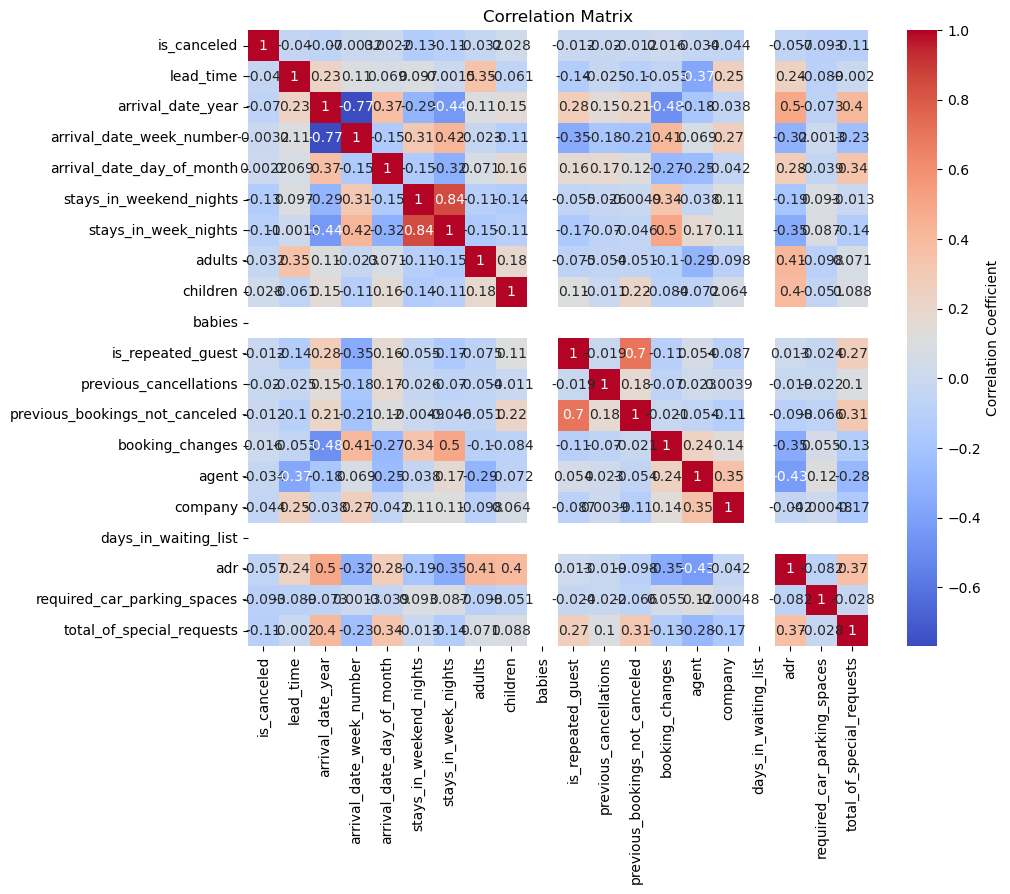

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix')
plt.show()

# Distribution of Bookings by Hotel Type

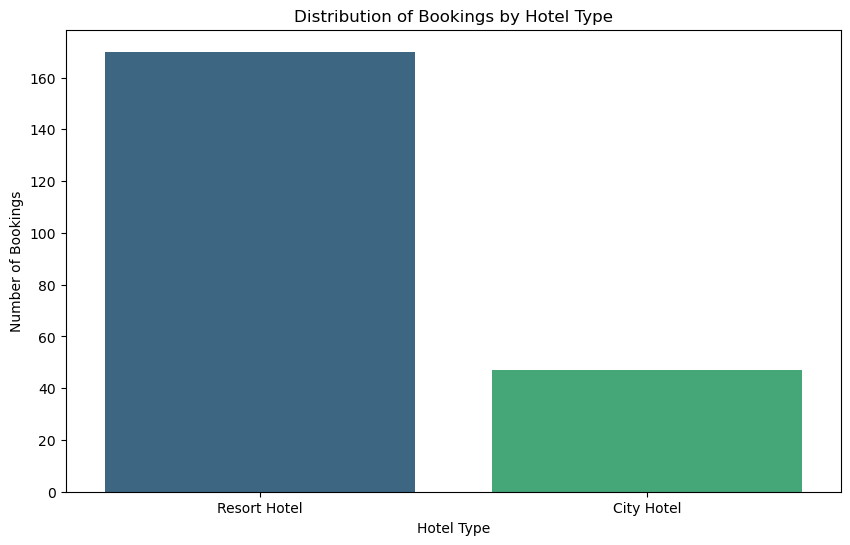

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel', palette='viridis')
plt.title('Distribution of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

# Average Daily Rate (ADR) by Hotel Type

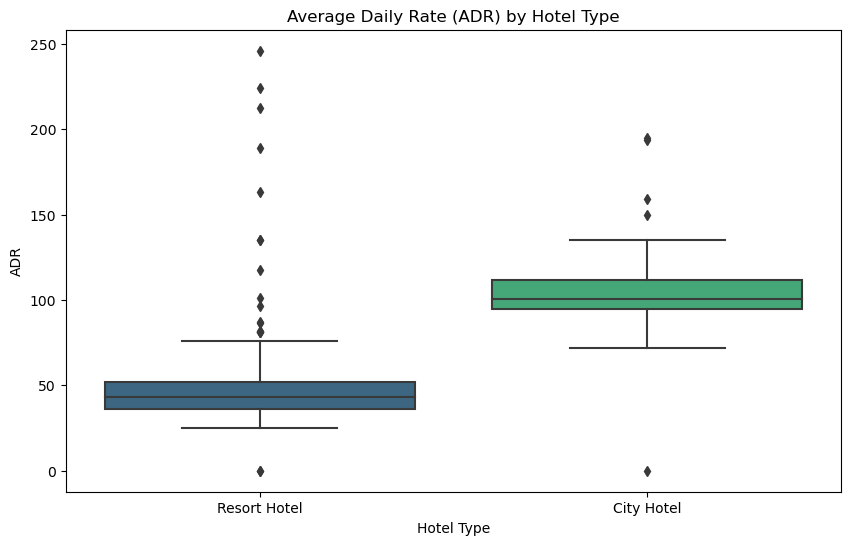

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hotel', y='adr', palette='viridis')
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

# Bookings by Customer Type

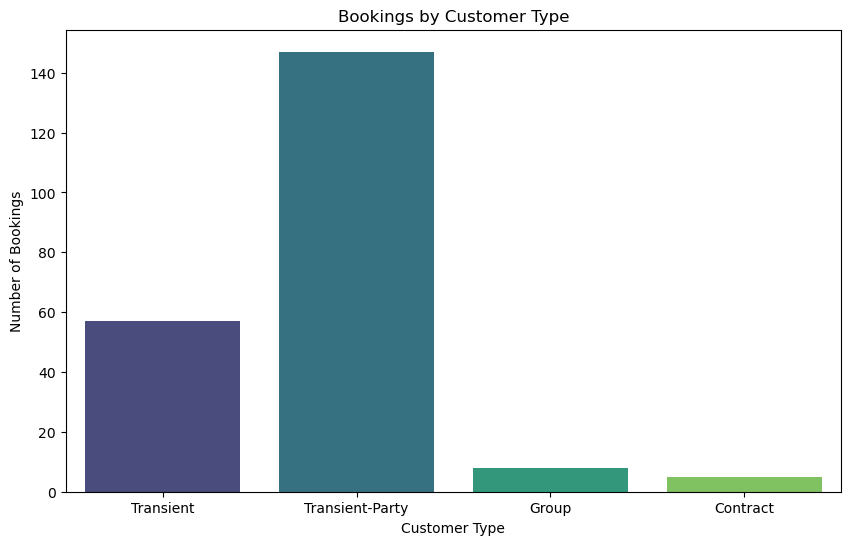

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_type', palette='viridis')
plt.title('Bookings by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Bookings')
plt.show()

# Bookings by Market Segment

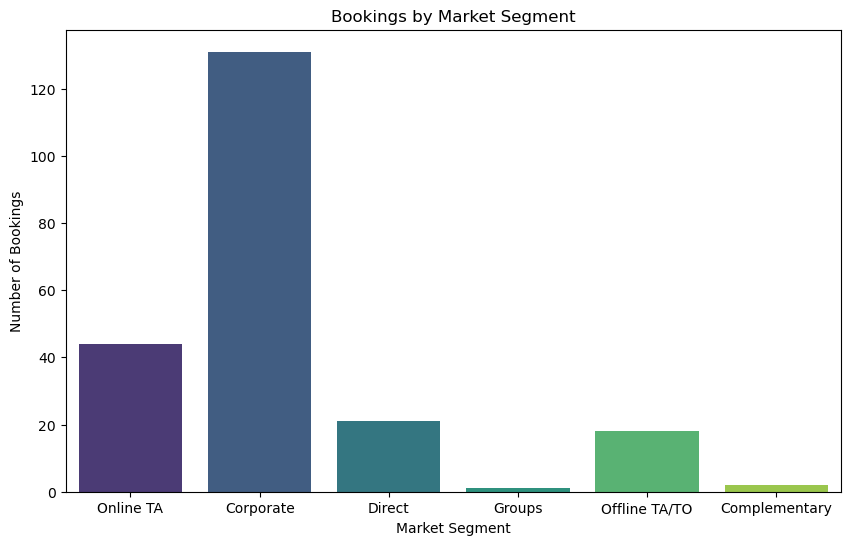

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='market_segment', palette='viridis')
plt.title('Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.show()

# Booking Cancellations

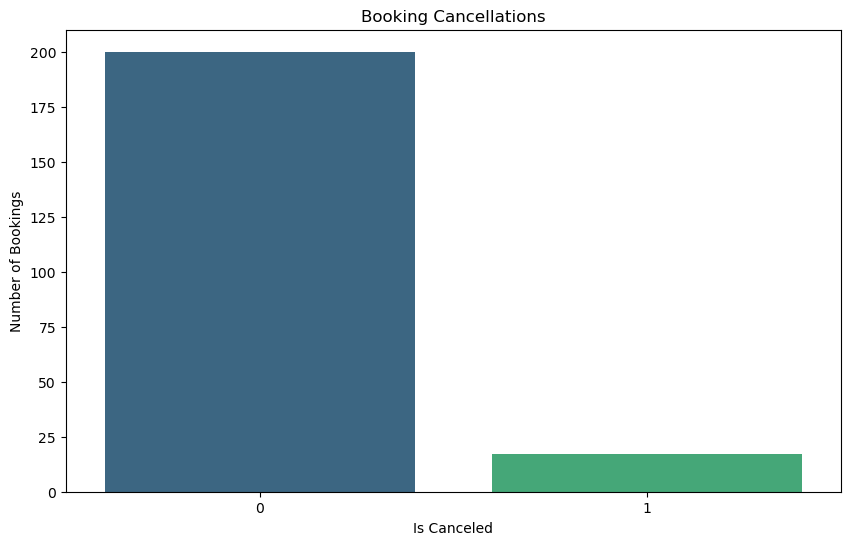

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_canceled', palette='viridis')
plt.title('Booking Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Number of Bookings')
plt.show()

# Lead Time Analysis

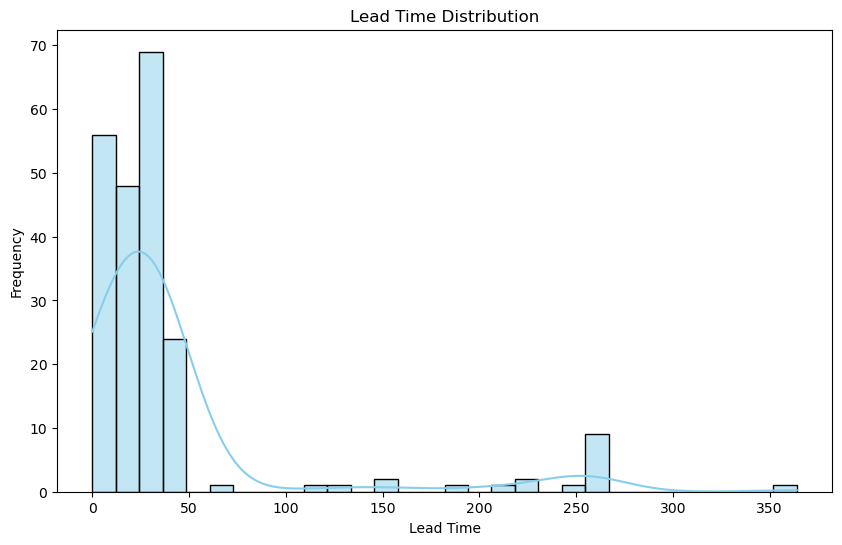

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=30, kde=True, color='skyblue')
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

# Monthly Booking Trends

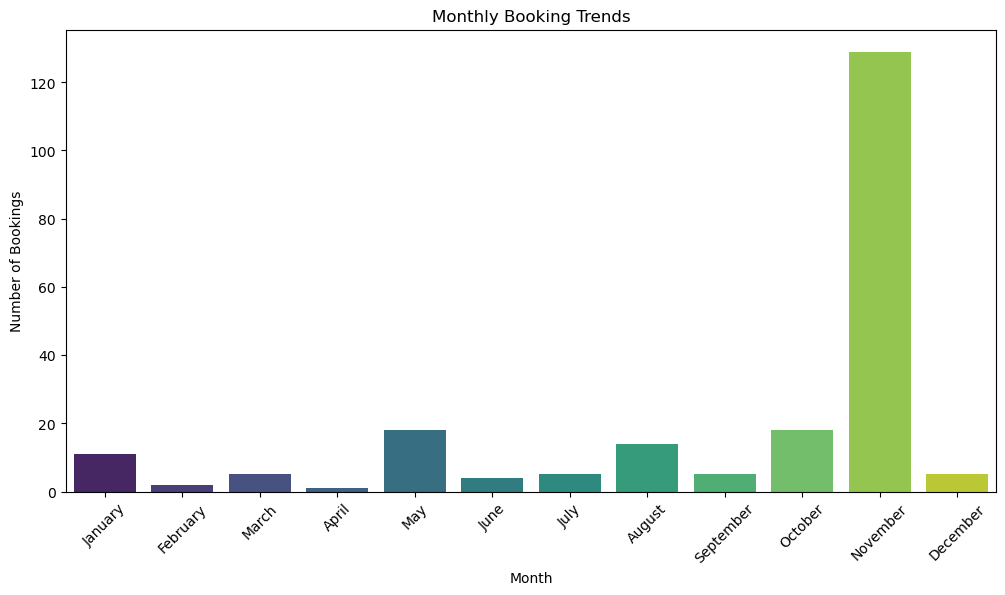

In [25]:
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

monthly_bookings = df['arrival_date_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='viridis')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Bookings by Distribution Channel

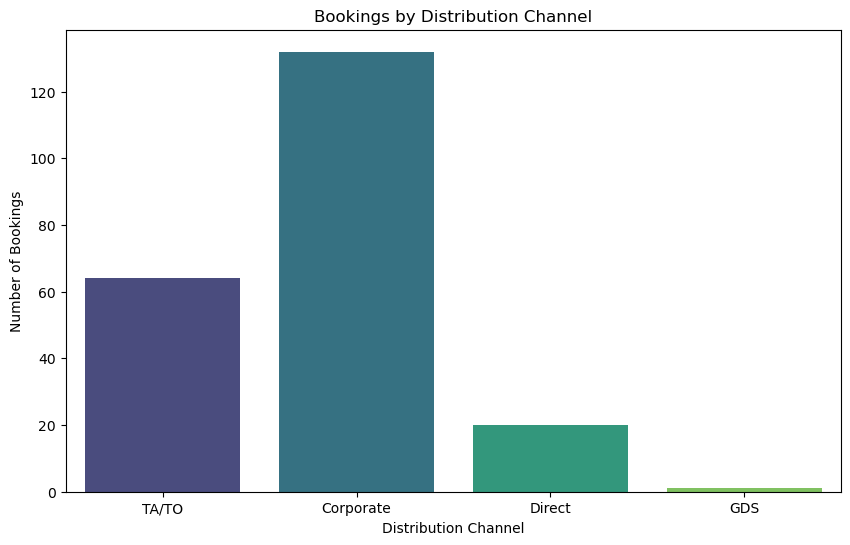

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='distribution_channel', palette='viridis')
plt.title('Bookings by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Bookings')
plt.show()

# Bookings by Meal Type

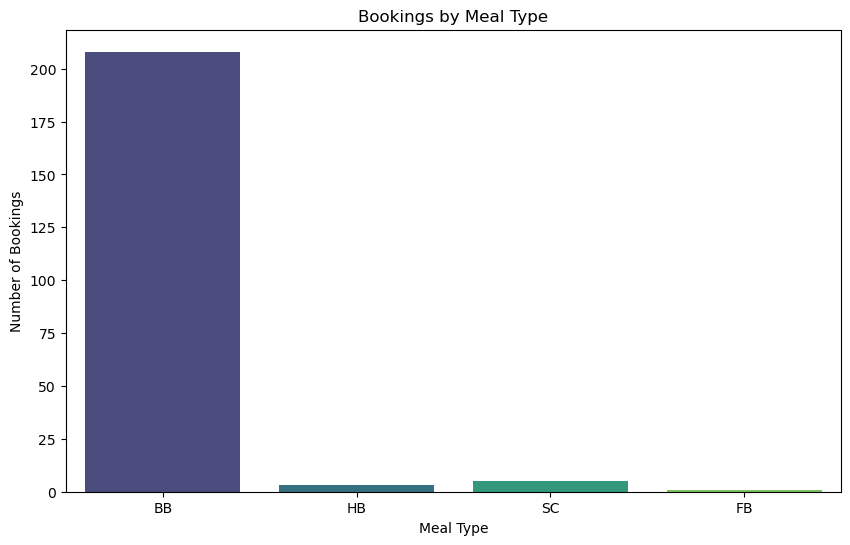

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='meal', palette='viridis')
plt.title('Bookings by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')
plt.show()

# Average Lead Time by Hotel Type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hotel', y='lead_time', palette='viridis')
plt.title('Average Lead Time by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time')
plt.show()

# Booking Changes by Hotel Type

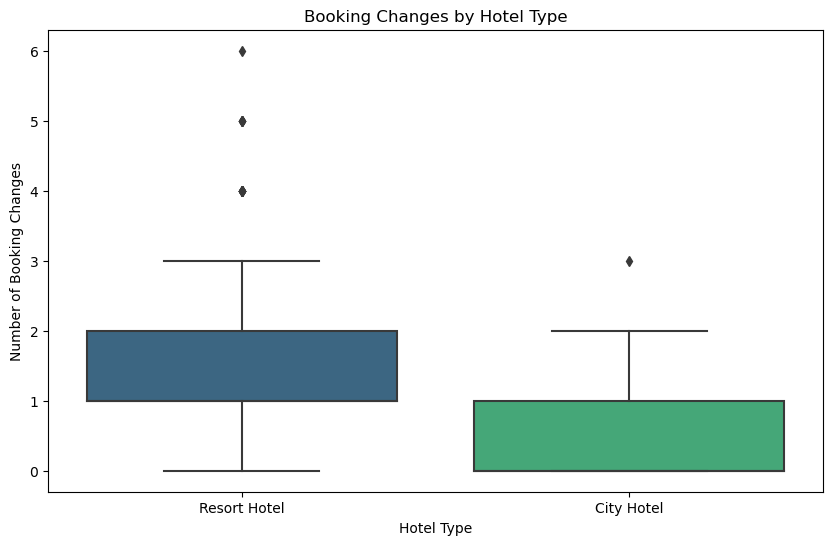

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hotel', y='booking_changes', palette='viridis')
plt.title('Booking Changes by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Booking Changes')
plt.show()

# Bookings by Country

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'PRT'),
  Text(1, 0, 'AUT'),
  Text(2, 0, 'FRA'),
  Text(3, 0, 'GBR'),
  Text(4, 0, 'DEU'),
  Text(5, 0, 'ITA'),
  Text(6, 0, 'ESP'),
  Text(7, 0, 'CZE'),
  Text(8, 0, 'BEL'),
  Text(9, 0, 'MEX')])

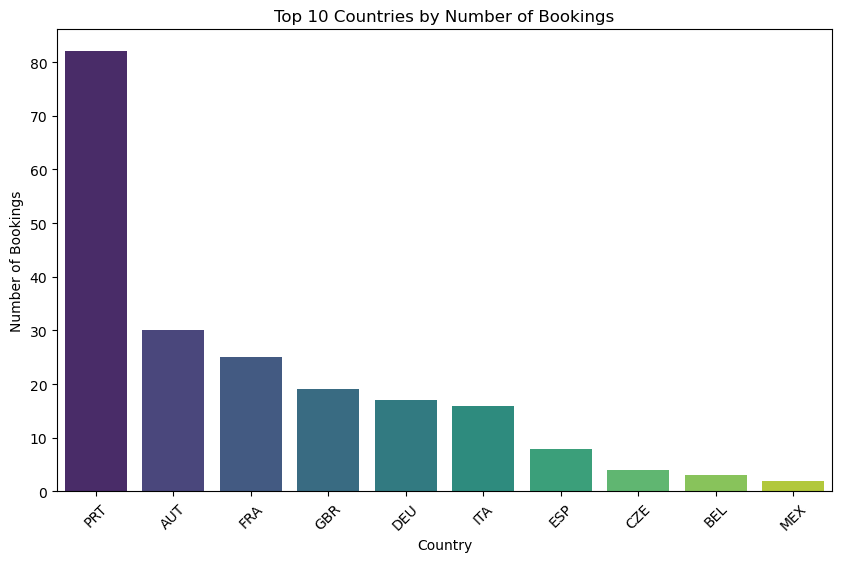

In [29]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)